# Studying the Small Scale Environment
## Relating Dwarf Galaxy Properties to Their Distance to Nearest Neighbor 

## Reading in NSA FITS file

### NSA (NASA Sloan Atlas)


 

In [46]:
#import astropy
from astropy.io import fits

from astropy.table import Table

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table, join

In [47]:
#Reading in data file

fits_NSA_file = r'C:\Users\caeho\OneDrive\Documents\University of Rochester REU\NSA_v1_0_1_VAGC_vflag-V2-VF.fits'
#data = r'C:\Users\caeho\OneDrive\Documents\University of Rochester REU\NSA_v1_0_1_VAGC_vflag-V2-VF.fits'

hdul = fits.open(fits_NSA_file) 

In [3]:
hdul.info()

Filename: C:\Users\caeho\OneDrive\Documents\University of Rochester REU\NSA_v1_0_1_VAGC_vflag-V2-VF.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    330   641409R x 141C   [19A, 27A, D, D, J, J, J, J, J, J, E, E, 7A, E, I, B, I, 3A, E, E, J, E, 7E, 7E, I, 7E, 7E, 7E, 7E, 7E, 5E, 7E, E, E, E, E, D, D, 7B, 105E, 105E, 105E, 105E, 105E, 105E, 7E, 7E, 7E, 7E, E, E, E, E, 7E, 7E, E, E, E, 7E, 7E, 7J, J, J, 8A, 15E, E, E, E, E, J, I, J, D, D, E, 6A, 27A, 8A, J, D, D, E, E, E, E, E, E, E, E, 7E, 7E, 7E, 7E, E, 7E, 7E, 7E, 7E, I, 7E, 7E, 7E, 7E, 5E, E, 7E, E, E, E, D, D, D, D, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K]   


In [48]:
# Names of all the collumns in the data base

data_header = hdul[1].header
data_header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4091 / length of dimension 1                          
NAXIS2  =               641409 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  141 / number of table fields                         
TTYPE1  = 'IAUNAME '                                                            
TFORM1  = '19A     '                                                            
TTYPE2  = 'SUBDIR  '                                                            
TFORM2  = '27A     '                                                            
TTYPE3  = 'RA      '        

In [49]:
data = hdul[1].data

### Creating a smaller data table with only data I will need

In [50]:
data_table = Table()

data_table['aimc'] = data['aimc']
data_table['IN_DR7_LSS'] = data['IN_DR7_LSS']
data_table['RA'] = data['RA']
data_table['DEC'] = data['DEC']
data_table['Z'] = data['Z']
data_table['ELPETRO_ABSMAG_r'] = data['ELPETRO_ABSMAG'][:,4]
data_table['u_r'] = data['u_r']
data_table['sSFR'] = data['sSFR']
data_table['HImass'] = data['HImass']
data_table['flag3727'] = data['flag3727']
data_table['t3'] = data['t3']
data_table['Z12logOH'] = data['Z12logOH']
data_table['Zerr'] = data['Zerr']
data_table['logNO'] = data['logNO']
data_table['NOerr'] = data['NOerr']
data_table['vflag_VF'] = data['vFlag_VF']
data_table['ID#'] = [i for i in range(len(data_table))]
data_table['BPTclass'] = data['BPTclass']
data_table['ELPETRO_MASS'] = data['ELPETRO_MASS'] #using for the change in sSFR calcuation for metallicity

'''
Here is what will be added for the metallicity calculations

data_table['N2'] = data['N2']
data_table['O3'] = data['O3']
data_table['O2'] = data['O2']
data_table['Ha'] = data['Ha']
data_table['Hb'] = data['Hb']

Or these could've already been precalculated:

data_table['N2'] = data['N2'] (If this is not precalcuated will name it N2_H once calculated from N2)
data_table['O3N2'] = data['O3N2']
data_table['N2O2'] = data['N2O2'];


''';

## Import Emission Line Ratios

In [51]:
line_ratios = Table.read('line_ratios_test.txt', format = 'ascii.commented_header')
line_ratios[:5]

ID,N2O2,N2,O3N2
int32,float64,float64,float64
0,--,0.4947436433131245,0.001255013649526481
1,0.5264435955325992,0.5657208512869216,0.006401026006795794
2,0.2229008133253036,0.20637675851271112,0.021678865176341867
3,0.01223838468977084,0.17226625792173916,0.17855286821060004
4,--,0.31831424677839676,0.003361059935014224


In [8]:
#metallicity_lines = Table.read(r'C:\Users\caeho\OneDrive\Documents\University of Rochester REU\metallicity_lines_casey_cloud12.csv',
                               #format = 'ascii.fast_csv')
#metallicity_lines[:5]

### Adding line ratios to the full data table

In [52]:
data_table = join(data_table, line_ratios, keys_left='ID#', keys_right='ID', join_type='left')

In [53]:
data_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#,BPTclass,ELPETRO_MASS,ID,N2O2,N2,O3N2
float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int32,float64,float32,int32,float64,float64,float64
-99.0,0.0,146.714215072841,-1.0412800233313741,0.021222278,-19.303656,2.3124398291110992,nan,nan,nan,nan,nan,nan,nan,nan,9,0,nan,6833158000.0,0,--,0.4947436433131245,0.001255013649526481
1.0,1.0,146.6285851269414,-0.7651620976591762,0.06465632,-19.976496,2.976039946079254,-11.241625785827637,nan,nan,nan,nan,nan,nan,nan,2,1,3.0,12135996000.0,1,0.5264435955325992,0.5657208512869216,0.006401026006795794
-99.0,0.0,146.63170644325592,-0.9883467023052999,0.05265425,-18.431812,1.7119742929935455,nan,nan,nan,nan,nan,nan,nan,nan,2,2,nan,1788938800.0,2,0.2229008133253036,0.20637675851271112,0.021678865176341867
1.0,1.0,146.9341288729797,-0.6704053610430766,0.121270485,-21.559162,3.0934733152389526,-11.71275806427002,nan,nan,nan,nan,nan,nan,nan,9,3,-1.0,57484075000.0,3,0.01223838468977084,0.17226625792173916,0.17855286821060004
-99.0,1.0,146.9634997327016,-0.5447758299302171,0.055980586,-19.100992,2.044341266155243,nan,nan,nan,nan,nan,nan,nan,nan,2,4,nan,4724134000.0,4,--,0.31831424677839676,0.003361059935014224


In [54]:
mask = data_table['Z']>0     #removing objects that are not galaxies
data_table = data_table[mask]

In [55]:
mask = data_table['ELPETRO_ABSMAG_r']>-25 #Removing outlier galaxies with M < -25
data_table = data_table[mask]

In [56]:
data_table[:10] # viewing first 5 rows of data as reference

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#,BPTclass,ELPETRO_MASS,ID,N2O2,N2,O3N2
float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int32,float64,float32,int32,float64,float64,float64
-99.0,0.0,146.714215072841,-1.0412800233313741,0.021222278,-19.303656,2.3124398291110992,nan,nan,nan,nan,nan,nan,nan,nan,9,0,nan,6833158000.0,0,--,0.4947436433131245,0.001255013649526481
1.0,1.0,146.6285851269414,-0.7651620976591762,0.06465632,-19.976496,2.976039946079254,-11.241625785827637,nan,nan,nan,nan,nan,nan,nan,2,1,3.0,12135996000.0,1,0.5264435955325992,0.5657208512869216,0.006401026006795794
-99.0,0.0,146.63170644325592,-0.9883467023052999,0.05265425,-18.431812,1.7119742929935455,nan,nan,nan,nan,nan,nan,nan,nan,2,2,nan,1788938800.0,2,0.2229008133253036,0.20637675851271112,0.021678865176341867
1.0,1.0,146.9341288729797,-0.6704053610430766,0.121270485,-21.559162,3.0934733152389526,-11.71275806427002,nan,nan,nan,nan,nan,nan,nan,9,3,-1.0,57484075000.0,3,0.01223838468977084,0.17226625792173916,0.17855286821060004
-99.0,1.0,146.9634997327016,-0.5447758299302171,0.055980586,-19.100992,2.044341266155243,nan,nan,nan,nan,nan,nan,nan,nan,2,4,nan,4724134000.0,4,--,0.31831424677839676,0.003361059935014224
2.0,1.0,146.96352370262414,-0.7593404235056136,0.09708638,-20.089943,2.836669385433197,-10.860784530639648,nan,nan,nan,nan,nan,nan,nan,2,5,5.0,12489805000.0,5,0.20054884154799274,0.7284012546697451,0.194473268150988
-1.0,1.0,146.85984630722874,-0.8089065016506019,0.12658988,-21.062517,2.6804080605506897,-12.071269035339355,nan,nan,nan,nan,nan,nan,nan,9,6,-1.0,38875206000.0,6,0.3038391817959875,2.4177401353874397,0.03606918174968211
40.35,1.0,146.5927838471015,-0.7602574022145185,0.064959235,-19.976143,2.08747461438179,-10.100362777709961,nan,1.0,6.100532417853275,6.363146339155186,0.33988585308459446,-0.18586781042085843,0.404887347385603,2,7,1.0,8501121500.0,7,0.6175497954293531,0.3697980730155581,0.002610767946147577
-2.0,1.0,146.72838067287842,-0.5569743913807053,0.089311965,-19.900196,2.5430691242218018,-11.400724411010742,nan,nan,nan,nan,nan,nan,nan,2,8,2.0,9400361000.0,8,0.04789182058309896,0.24223345900307594,0.02426522164951037


# Calcuating New Metallicities (N2 Method, O3N2 Method, and N2O2 Method)

### This is an outline attempt of what I will code once I have access to the data I need to start)

In [40]:
'''data_table['Z12logOH_N2'] = np.nan
data_table['Z12logOH_O3N2'] = np.nan
data_table['Z12logOH_N2O2'] = np.nan

for i in range(len(data_table)):
    
    data_table['Z12logOH_N2'] = 9.12 + 0.58 * np.log(data_table['N2_H'][i]) - 0.19 * data_table['change_log_sSFR'][i]
    
    data_table['Z12logOH_O3N2'] = 8.98 - 0.32 * np.log(data_table['O3N2'][i]) - 0.18 * data_table['change_log_sSFR'][i]
    
    data_table['Z12logOH_N2O2'] = 9.20 + 0.54 * np.log(data_table['N2O2'][i]) - 0.36 * data_table['change_log_sSFR'][i]
    
    
    #12+log(O/H)N2=9.12+0.58×log(N2) −0.19×∆log(SSFR)
    #12+log(O/H)O3N2=8.98−0.32×log(O3N2) −0.18×∆log(SSFR)
    #12+log(O/H)N2O2=9.20+0.54×log(N2O2) −0.36×∆log(SSFR).''';

In [59]:

    
#data_table['log_M_sSFR'] = 283.728 - 116.265 * np.log(data_table['ELPETRO_MASS']) + 17.4403 * (np.log(data_table['ELPETRO_MASS']**2)) - 1.17146 * (np.log(data_table['ELPETRO_MASS']**3)) + 0.0296526 *(np.log(data_table['ELPETRO_MASS']**4))

data_table['log_M_sSFR'] = 283.728 - 116.265 * np.log10(data_table['ELPETRO_MASS']) + 17.4403 * (np.log10(data_table['ELPETRO_MASS']))**2 - 1.17146 * (np.log10(data_table['ELPETRO_MASS']))**3 + 0.0296526 *(np.log10(data_table['ELPETRO_MASS']))**4


data_table['change_log_sSFR'] = data_table['sSFR'] - data_table['log_M_sSFR'] #have to take the absolute value of sSFR?

data_table['Z12logOH_N2'] = 9.12 + 0.58 * np.log(data_table['N2']) - 0.19 * data_table['change_log_sSFR'] 
data_table['Z12logOH_O3N2'] = 8.98 - 0.32 * np.log(data_table['O3N2']) - 0.18 * data_table['change_log_sSFR']   
data_table['Z12logOH_N2O2'] = 9.20 + 0.54 * np.log(data_table['N2O2']) - 0.36 * data_table['change_log_sSFR']

C:\Users\caeho\AppData\Local\Temp\ipykernel_1912\734978003.py:3: RuntimeWarning: divide by zero encountered in log10
  data_table['log_M_sSFR'] = 283.728 - 116.265 * np.log10(data_table['ELPETRO_MASS']) + 17.4403 * (np.log10(data_table['ELPETRO_MASS']))**2 - 1.17146 * (np.log10(data_table['ELPETRO_MASS']))**3 + 0.0296526 *(np.log10(data_table['ELPETRO_MASS']))**4
C:\Users\caeho\AppData\Local\Temp\ipykernel_1912\734978003.py:8: RuntimeWarning: divide by zero encountered in log
  data_table['Z12logOH_N2'] = 9.12 + 0.58 * np.log(data_table['N2']) - 0.19 * data_table['change_log_sSFR']
C:\Users\caeho\AppData\Local\Temp\ipykernel_1912\734978003.py:8: RuntimeWarning: invalid value encountered in log
  data_table['Z12logOH_N2'] = 9.12 + 0.58 * np.log(data_table['N2']) - 0.19 * data_table['change_log_sSFR']
C:\Users\caeho\AppData\Local\Temp\ipykernel_1912\734978003.py:9: RuntimeWarning: divide by zero encountered in log
  data_table['Z12logOH_O3N2'] = 8.98 - 0.32 * np.log(data_table['O3N2']) -

In [60]:
data_table[20:40]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#,BPTclass,ELPETRO_MASS,ID,N2O2,N2,O3N2,log_M_sSFR,change_log_sSFR,Z12logOH_N2,Z12logOH_O3N2,Z12logOH_N2O2
float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int32,float64,float32,int32,float64,float64,float64,float32,float64,float64,float64,float64
-99.0,0.0,146.323507865649,-1.1808767696376143,0.08926281,-20.350409,2.4429447948932648,nan,nan,nan,nan,nan,nan,nan,nan,9,20,nan,15325401000.0,20,--,nan,--,-9.876007,nan,nan,--,--
52.62,1.0,146.51282656812873,-0.8457827585323747,0.064901724,-21.055265,1.7899836599826813,-10.019564628601074,nan,1.0,3.9590963221101605,6.581731193386942,0.42753159537262253,-0.03224054982716851,0.5122763360867023,2,21,1.0,26622702000.0,21,0.9967694422555469,0.49775479672840156,0.0002775317481956793,-9.929932,-0.08963298797607422,8.732394602143632,11.616798009326738,9.230520550549906
77.94,1.0,146.44834996246593,-0.7134376442905851,0.114679344,-20.710001,1.5418799221515656,-9.526228904724121,nan,1.0,2.3576846862562824,7.116209950777211,0.34042882927442153,-0.24334163774942397,0.40941078717718177,9,22,3.0,10291406000.0,22,1.030109582799119,0.4243628873568425,0.0009233565856741216,-9.82959,0.3033609390258789,8.565204954020423,11.161393451688149,9.106809263281425
-99.0,0.0,146.5727481211919,-1.0608402695579584,0.060614403,-20.16317,2.334265857934952,nan,nan,nan,nan,nan,nan,nan,nan,9,23,nan,14985875000.0,23,--,0.38677086520303416,0.002773784900198848,-9.873657,nan,nan,nan,--
1.0,1.0,146.85758177671153,-0.2187844698584594,0.12461211,-21.040443,3.081216812133789,-11.826451301574707,nan,nan,nan,nan,nan,nan,nan,9,24,-1.0,37474406000.0,24,0.4658548842718916,1.0417558817610415,0.02394717638287576,-9.955444,-1.871006965637207,9.499217753130242,10.510990808504745,9.461066713361756
28.66,1.0,146.9012737310725,-0.41316370270651365,0.056547936,-19.458952,2.7250927686691284,-10.984579086303711,nan,nan,nan,nan,nan,nan,nan,2,25,3.0,8444928500.0,25,--,0.5059997447701862,0.009169971188312583,-9.804504,-1.180074691772461,8.94910710525787,10.693796207613234,--
-99.0,1.0,146.86906283664848,-0.48780473510808764,0.08326827,-19.248146,1.9016674160957336,nan,nan,nan,nan,nan,nan,nan,nan,2,26,nan,7197505000.0,26,0.7619574182838926,0.48076358911544687,0.010473887890626712,-9.783417,nan,nan,nan,nan
53.62,1.0,146.86432664484698,-0.4640613475967274,0.06510994,-19.754606,2.0364493131637573,-9.923773765563965,nan,nan,nan,nan,nan,nan,nan,2,27,1.0,6774319000.0,27,--,0.350007798594418,0.0007896479213842483,-9.775116,-0.14865779876708984,8.539361072797574,11.292813885690741,--
1.0,1.0,146.8915925363065,-0.5126719548057409,0.08389291,-19.799307,2.647901177406311,-10.354166984558105,nan,nan,nan,nan,nan,nan,nan,2,28,2.0,10998947000.0,28,1.360469154873536,0.4912868456996346,0.003345464276291952,-9.837769,-0.5163984298706055,8.805893975182705,10.89699965271611,9.552131422576275


## New table with only the ID and new metallicities

In [65]:
new_metallicities = Table()

In [67]:
new_metallicities['ID'] = data_table['ID']
new_metallicities['Z12logOH_N2'] = data_table['Z12logOH_N2']
new_metallicities['Z12logOH_O3N2'] = data_table['Z12logOH_O3N2']
new_metallicities['Z12logOH_N2O2'] = data_table['Z12logOH_N2O2']

new_metallicities

ID,Z12logOH_N2,Z12logOH_O3N2,Z12logOH_N2O2
int32,float64,float64,float64
0,nan,nan,--
1,9.05410089261007,10.846994469570287,9.354688881447126
2,nan,nan,nan
3,8.429828842551752,9.843839267905041,7.447325280051114
4,nan,nan,--
5,9.127704794543192,9.685416633162628,8.69524187514383
6,10.033609318863869,10.42357223562827,9.317583299455352
7,8.599079396831259,10.936507164685713,9.04594576379877
8,8.598329226366802,10.4548462371882,8.128759634248087


In [68]:
#new_metallicities.write('new_metallicities.txt', format = 'ascii.commented_header', overwrite = True)

## Galatic Coordinate Plot

using this a guide https://astronomy.stackexchange.com/questions/32601/how-do-i-plot-galactic-coordinates-using-matplotlib-and-astropy-in-python

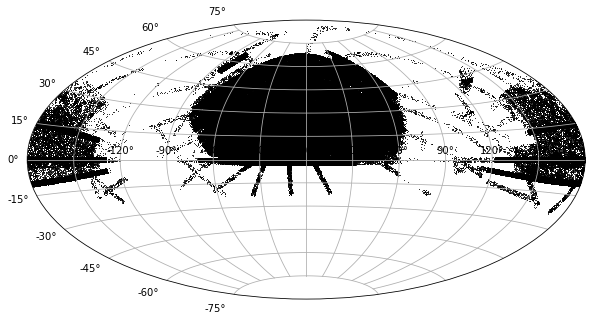

In [20]:
import astropy.units as u
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord

plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

eq = SkyCoord(180-data_table['RA'], data_table['DEC'], unit=u.deg)
gal = eq.galactic

gal = SkyCoord(180-data_table['RA'], data_table['DEC'], frame='galactic', unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian,
            gal.b.radian, marker='o', c='k', s=1, lw=0); #added same marker appearance as above code


# Finding Nearest Neighbor & Distance

### Table of only Dwarf Galaxies (ABSMAG_r >-17)

reference https://stackoverflow.com/questions/60448562/remove-row-from-astropy-table

In [21]:
import pandas as pd
import numpy as np

dwarf_table = data_table
mask = (dwarf_table['ELPETRO_ABSMAG_r']<-17) | (dwarf_table['IN_DR7_LSS']!= 1) #removing galaxies w/ magnitude larger than -17
dwarf_table = dwarf_table[~mask]
RA_boolean = (dwarf_table['RA']>110) & (dwarf_table['RA']<270) #removing strips and area outside main area
dwarf_table = dwarf_table[RA_boolean]
dwarf_table[:5]



aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#,BPTclass,ELPETRO_MASS,ID,N2O2,N2,O3N2,log_M_sSFR,change_log_sSFR,Z12logOH_N2,Z12logOH_O3N2,Z12logOH_N2O2
float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int32,float64,float32,int32,float64,float64,float64,float32,float64,float64,float64,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282841,-15.534674,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,1.0,166894200.0,12,--,0.08973320028112487,0.11009802486185184,193.8899,-191.59763542690484,44.12522034858537,44.17361731281316,--
106.68,1.0,146.85676432411947,-0.27409664376066756,0.021964595,-16.700323,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,1.0,345845760.0,31,-0.005755216871632611,0.08809698232490563,0.14576226541364554,267.20166,-264.9358049997449,58.048799090261596,57.28469395707754,--
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323,-15.290873,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,1.0,80404424.0,44,--,0.04247225350581784,0.30427576234431253,136.06372,-133.8073163478401,32.71122562662242,33.44605962286067,--
199.39,1.0,146.00780426178756,-0.6422574964819474,0.0047763,-15.831653,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,1.0,30160636.0,45,--,--,--,78.881836,-76.80459987337436,--,--,--
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635,-16.344551,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,1.0,218464720.0,49,--,0.1588204026039546,0.029528123381815347,219.03052,-216.75129995158312,49.23555786084286,49.12240587441928,--


### Galactic plot of Dwarf Galaxies
            

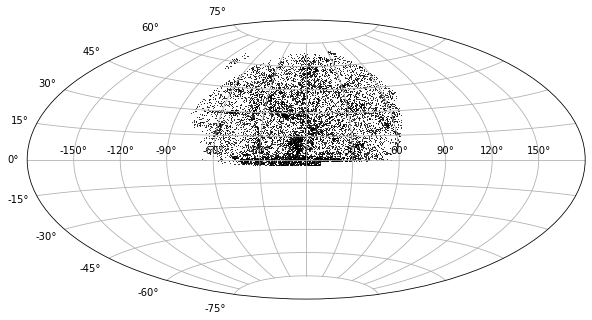

In [22]:
plt.rcParams["figure.figsize"] = (10,6) #increase size of figure

eq = SkyCoord(180-dwarf_table['RA'], dwarf_table['DEC'], unit=u.deg) #centering galaxies
gal = eq.galactic

gal = SkyCoord(180-dwarf_table['RA'], dwarf_table['DEC'], frame='galactic', unit=u.deg)


plt.subplot(111, projection='aitoff')
plt.grid(True)

plt.scatter(gal.l.wrap_at('180d').radian,
            gal.b.radian, marker='o', c='k', s=1, lw=0); 


### Distance Method #1: 2D Distance 

Calculating the relative velocity b/t each galaxy

Equation to calculate relative velocity: $v_{rel} = |z_{a} - z_{b}|c$

All neighbors galaxies have a maximum relative velocity: $v_{rel} < 300  km/s$

info on SkyCoord under the section "Distance" https://docs.astropy.org/en/stable/coordinates/index.html

In [23]:
from astropy import constants as const
from astropy import units as u
from astropy.coordinates import SkyCoord

h=1
H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant

#creating the new columns
dwarf_table['2D_neighbor_ID'] = -1
dwarf_table['2D_neighbor_dist'] = np.nan

#columns for virial radius normalization 
dwarf_table['2D_neighbor_ID_vir'] = -1
dwarf_table['2D_neighbor_dist_vir'] = np.nan

#gamma ratio in virial radius calculation
data_table['gamma_ratio'] = 1 
data_table['gamma_ratio'][data_table['aimc'] == 1] = 2 
data_table['gamma_ratio'][data_table['aimc'] == 2] = 2
                          


for i in range(len(dwarf_table)):
    neighbor_list=(abs(dwarf_table['Z'][i]-data_table['Z'])*const.c) < 300*u.km/u.s #galaxies in relative velocity constraint
    
    di = data_table['ID#'] == dwarf_table['ID#'][i] #finding the dwarf galaxy inside larger table
    neighbor_list[di]= False #removing from its neighbor list
   
    #avg distance to systems (r average)
    avg_dist = .5*(const.c.to('km/s')*(dwarf_table['Z'][i]+data_table['Z'][neighbor_list])/H0) 
    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=avg_dist)
    neighbor_pos = SkyCoord(ra=data_table['RA'][neighbor_list]*u.degree, 
                            dec=data_table['DEC'][neighbor_list]*u.degree, distance=avg_dist)
    
    neighbor_dist=neighbor_pos.separation_3d(dwarf_pos) #separation calculation of all possible neighbors
    
    nearby_neigh_index = np.argmin(neighbor_dist) #finding closest neighbor
    
    dwarf_table['2D_neighbor_dist'][i] = neighbor_dist[nearby_neigh_index].value #unit Mpc, adding to dwarf table
    
    neighbor_id = data_table['ID#'][neighbor_list] 
    dwarf_table['2D_neighbor_ID'][i] = neighbor_id[nearby_neigh_index] #adding neighbor galaxy's ID to dwarf table
    
    
    # Doing calculation with virial radius normalization
    
    M = data_table['ELPETRO_ABSMAG_r'][neighbor_list] #absolute magnitude of neighboring galaxies
    
    gamma_ratio = data_table['gamma_ratio'][neighbor_list] #gamma ratio of neighboring galaxies
    
    
    L_ratio = 10**((-20-M)/2.5) #luminosity ratio for virial radius calcuation
    
    r_vir = ((3*gamma_ratio*L_ratio)/(4*740*0.0223*np.pi))**(1./3) # calculating virial radius of all neighboring galaxies
    
    
    neighbor_dist_vir = neighbor_dist / r_vir # normalizing distance
    
    nearby_neigh_index_vir = np.nanargmin(neighbor_dist_vir) #finding closest neighbor with normalized virial distance
    
    dwarf_table['2D_neighbor_dist_vir'][i] = neighbor_dist_vir[nearby_neigh_index_vir].value #unit , adding to dwarf table
    
    
    dwarf_table['2D_neighbor_ID_vir'][i] = neighbor_id[nearby_neigh_index_vir] #adding neighbor galaxy's ID to dwarf table
    
    
    

C:\Users\caeho\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [24]:
dwarf_table[:10]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#,BPTclass,ELPETRO_MASS,ID,N2O2,N2,O3N2,log_M_sSFR,change_log_sSFR,Z12logOH_N2,Z12logOH_O3N2,Z12logOH_N2O2,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir
float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int32,float64,float32,int32,float64,float64,float64,float32,float64,float64,float64,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282841,-15.534674,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,1.0,166894200.0,12,--,0.08973320028112487,0.11009802486185184,193.8899,-191.59763542690484,44.12522034858537,44.17361731281316,--,49,0.18150554228021565,585714,1.3634632510011546
106.68,1.0,146.85676432411947,-0.27409664376066756,0.021964595,-16.700323,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,1.0,345845760.0,31,-0.005755216871632611,0.08809698232490563,0.14576226541364554,267.20166,-264.9358049997449,58.048799090261596,57.28469395707754,--,79,0.6704515586457357,92,2.414294367856323
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323,-15.290873,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,1.0,80404424.0,44,--,0.04247225350581784,0.30427576234431253,136.06372,-133.8073163478401,32.71122562662242,33.44605962286067,--,585695,0.035663331434249095,639857,0.46035331496314846
199.39,1.0,146.00780426178756,-0.6422574964819474,0.0047763,-15.831653,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,1.0,30160636.0,45,--,--,--,78.881836,-76.80459987337436,--,--,--,585695,0.006393284307917346,585695,0.08348257342324528
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635,-16.344551,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,1.0,218464720.0,49,--,0.1588204026039546,0.029528123381815347,219.03052,-216.75129995158312,49.23555786084286,49.12240587441928,--,585714,0.07059729101415332,585714,0.4172620229334301
21.37,1.0,146.28299647851426,0.0641463074401177,0.021579895,-16.594152,2.861306369304657,-10.189197540283203,nan,nan,nan,nan,nan,nan,nan,2,91,1.0,556904200.0,91,--,0.2926248083650698,0.01051346286289177,324.80127,-322.47994143684315,69.67844774832913,68.48402103165189,--,80,0.038323438909891316,92,0.17226127693210824
0.0,1.0,145.3209420527222,0.771115298508063,0.0065894895,-14.810565,1.925416886806488,-9.748167991638184,nan,0.0,3.57494352664153,7.007952737418975,0.2935407103312847,-0.9956427104372425,0.4090425521885854,2,186,1.0,53514004.0,186,--,0.12105994838462619,0.018804721739338767,109.73169,-107.45461008406386,28.311723655341382,29.593396946118023,--,208,0.16133006586884238,208,0.576340261650062
-99.0,1.0,145.4212238164792,0.5359777701124617,0.14598592,-14.866592,-3.4473413228988647,nan,nan,nan,nan,nan,nan,nan,nan,9,209,nan,15936079.0,209,--,1.4742825582570833,--,52.008545,nan,nan,--,--,206,0.23624643923335842,206,0.5428900018158784
0.0,1.0,146.26576246056774,1.2304320197663696,0.006355164,-14.235288,1.6930833458900452,-9.700735092163086,nan,0.0,4.040375795270858,7.048466376827344,0.3785143362106475,-1.2323400004904403,0.5170923842950506,2,238,1.0,13209631.0,238,--,0.08065034985291372,0.1847316962025261,45.414795,-43.142593256539804,15.856866079569969,17.286099041342155,--,55137,0.13915957213413985,55243,0.8924983833408165


### Distance Method #2: 3D Distance

In [25]:

#creating the new columns
dwarf_table['3D_neighbor_ID'] = -1
dwarf_table['3D_neighbor_dist'] = np.nan

#columns for virial radius normalization 
dwarf_table['3D_neighbor_ID_vir'] = -1
dwarf_table['3D_neighbor_dist_vir'] = np.nan

h=1
H0 = 100*h*u.km/u.s/u.Mpc #Hubble's Constant


#gamma ratio in virial radius calculation
data_table['gamma_ratio'] = 1 
data_table['gamma_ratio'][data_table['aimc'] == 1] = 2 
data_table['gamma_ratio'][data_table['aimc'] == 2] = 2



for i in range(len(dwarf_table)):
    di = ~(data_table['ID#'] == dwarf_table['ID#'][i]) #finding the dwarf galaxy inside larger table
    #data_table[di]= False #removing dwarf from the full table to not count itself
    
    #distances to systems
    dwarf_r = const.c.to('km/s')*dwarf_table['Z'][i]/H0 
    gal_r = const.c.to('km/s')*data_table['Z'][di]/H0

    
    #galaxy positions to calcuate their separation
    dwarf_pos = SkyCoord(ra=dwarf_table['RA'][i]*u.degree, dec=dwarf_table['DEC'][i]*u.degree, distance=dwarf_r)
    gal_pos = SkyCoord(ra=data_table['RA'][di]*u.degree, 
                            dec=data_table['DEC'][di]*u.degree, distance=gal_r)
    neighbor_dist=gal_pos.separation_3d(dwarf_pos)
    
    nearby_neigh_index = np.argmin(neighbor_dist) #finding the nearest neighbor
    
    
    dwarf_table['3D_neighbor_dist'][i] = neighbor_dist[nearby_neigh_index].value #unit Mpc
     
    neighbor_id = data_table['ID#'][di] 
    dwarf_table['3D_neighbor_ID'][i] = neighbor_id[nearby_neigh_index] #ID# of the closest neighbor galaxy
    
    # Doing calculation with virial radius normalization
    
    M = data_table['ELPETRO_ABSMAG_r'][di] #[data_table] #absolute magnitude of neighboring galaxies
    
    gamma_ratio = data_table['gamma_ratio'][di] #[data_table] #gamma ratio of neighboring galaxies
    
    
    L_ratio = 10**((-20-M)/2.5) #luminosity ratio for virial radius calcuation
    
    r_vir = ((3*gamma_ratio*L_ratio)/(4*740*0.0223*np.pi))**(1./3) # calculating virial radius of all neighboring galaxies
    
    
    neighbor_dist_vir = neighbor_dist / r_vir # normalizing distance
    

    
    nearby_neigh_index_vir = np.nanargmin(neighbor_dist_vir) #finding closest neighbor with normalized virial distance
    
    dwarf_table['3D_neighbor_dist_vir'][i] = neighbor_dist_vir[nearby_neigh_index_vir].value #unit , adding to dwarf table
    
    
    neighbor_id = data_table['ID#'][di]
    dwarf_table['3D_neighbor_ID_vir'][i] = neighbor_id[nearby_neigh_index_vir] #adding neighbor galaxy's ID to dwarf table
    
    
    
    

C:\Users\caeho\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [26]:
dwarf_table[:5]

aimc,IN_DR7_LSS,RA,DEC,Z,ELPETRO_ABSMAG_r,u_r,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,logNO,NOerr,vflag_VF,ID#,BPTclass,ELPETRO_MASS,ID,N2O2,N2,O3N2,log_M_sSFR,change_log_sSFR,Z12logOH_N2,Z12logOH_O3N2,Z12logOH_N2O2,2D_neighbor_ID,2D_neighbor_dist,2D_neighbor_ID_vir,2D_neighbor_dist_vir,3D_neighbor_ID,3D_neighbor_dist,3D_neighbor_ID_vir,3D_neighbor_dist_vir
float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int32,float64,float32,int32,float64,float64,float64,float32,float64,float64,float64,float64,int32,float64,int32,float64,int32,float64,int32,float64
0.0,1.0,147.17645340393182,-0.3540349522432606,0.006282841,-15.534674,1.5979467332363129,-9.897252082824707,nan,nan,nan,nan,nan,nan,nan,2,12,1.0,166894200.0,12,--,0.08973320028112487,0.11009802486185184,193.8899,-191.59763542690484,44.12522034858537,44.17361731281316,--,49,0.18150554228021565,585714,1.3634632510011546,573,0.3210655024172438,208,2.3657856725525463
106.68,1.0,146.85676432411947,-0.27409664376066756,0.021964595,-16.700323,1.6220477223396301,-9.639364242553711,nan,nan,nan,nan,nan,nan,nan,2,31,1.0,345845760.0,31,-0.005755216871632611,0.08809698232490563,0.14576226541364554,267.20166,-264.9358049997449,58.048799090261596,57.28469395707754,--,79,0.6704515586457357,92,2.414294367856323,80,0.9556330809587631,585700,3.7385754919749274
0.0,1.0,146.19277353258968,-0.6882589506846374,0.004080323,-15.290873,1.220979243516922,-9.548693656921387,nan,nan,nan,nan,nan,nan,nan,2,44,1.0,80404424.0,44,--,0.04247225350581784,0.30427576234431253,136.06372,-133.8073163478401,32.71122562662242,33.44605962286067,--,585695,0.035663331434249095,639857,0.46035331496314846,585695,0.221530846641702,585695,2.8927174640703734
199.39,1.0,146.00780426178756,-0.6422574964819474,0.0047763,-15.831653,0.7728094607591629,-7.982375621795654,nan,0.0,1.5717060395681055,7.73051787768279,0.0179600111522654,-0.5320566539047968,0.44255404846002694,2,45,1.0,30160636.0,45,--,--,--,78.881836,-76.80459987337436,--,--,--,585695,0.006393284307917346,585695,0.08348257342324528,639857,0.6010801341408164,639857,7.109919536505821
0.0,1.0,146.6190367018052,-0.43434631860351913,0.006036635,-16.344551,1.7559601366519928,-9.769034385681152,nan,nan,nan,nan,nan,nan,nan,2,49,1.0,218464720.0,49,--,0.1588204026039546,0.029528123381815347,219.03052,-216.75129995158312,49.23555786084286,49.12240587441928,--,585714,0.07059729101415332,585714,0.4172620229334301,585714,0.3596492056527832,585714,2.125689993784549


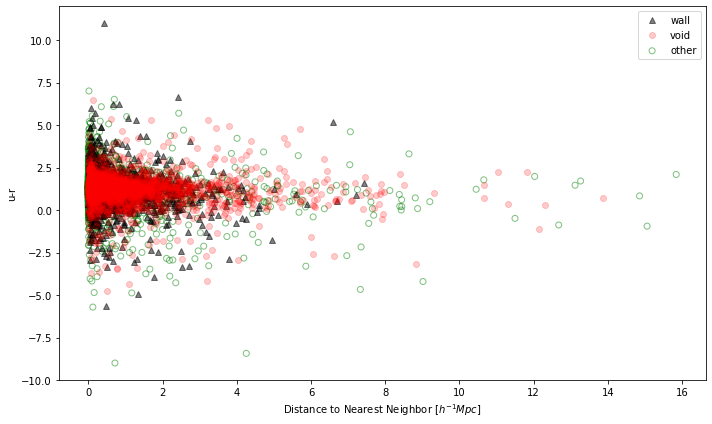

In [27]:
dwarf_wall = dwarf_table['vflag_VF']==0
dwarf_void = dwarf_table['vflag_VF']==1
dwarf_other = ~(dwarf_wall | dwarf_void)

plt.figure(tight_layout = True)
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_wall], dwarf_table['u_r'][dwarf_wall], "k^", alpha = 0.5, label = 'wall')
plt.plot(dwarf_table['2D_neighbor_dist'][dwarf_void], dwarf_table['u_r'][dwarf_void], "ro", alpha = 0.2, label = 'void')
plt.scatter(dwarf_table['2D_neighbor_dist'][dwarf_other], dwarf_table['u_r'][dwarf_other], facecolors='none', edgecolors='g', alpha = 0.5, label = 'other')
plt.legend()
plt.xlabel('Distance to Nearest Neighbor [$h^{-1}Mpc]$')
plt.ylabel('u-r');


In [28]:
#dwarf_table['ID#'].name = 'ID'

KeyError: 'Column ID already exists'

In [29]:
#dwarf_table.write('new_dwarf_table.txt', format = 'ascii.commented_header', overwrite = True)

In [ ]:
#data_table.write('new_gal_table.txt', format = 'ascii.commented_header', overwrite = True)

In [ ]:
#hdul.close() #closes file